In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engagement_1 = pd.read_csv('takehome_user_engagement.csv')
engagement_1.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


####  I want to build a "rolling window" 3 entries wide to determine if a user has logged on at least 3 times in a 7-day period.  I will group by users and order by time stamp.  

In [3]:

engagement_2 = engagement_1.sort_values(by=['user_id', 'time_stamp'])



In [4]:
engagement_2['time_stamp'] = pd.to_datetime(engagement_2['time_stamp'])

In [5]:
engagement_2.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

#### I will create the 'window' by shifting the times_stamp column down two values and then subtracting.

In [6]:
shift_2 = engagement_2.groupby('user_id')['time_stamp'].apply(lambda x: x.shift(2))

In [7]:
shift_2

user_id        
1        0                        NaT
2        1                        NaT
         2                        NaT
         3        2013-11-15 03:45:04
         4        2013-11-29 03:45:04
                          ...        
11996    207912                   NaT
11997    207913                   NaT
11998    207914                   NaT
11999    207915                   NaT
12000    207916                   NaT
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [8]:
no_shift = engagement_2.groupby('user_id')['time_stamp'].apply(lambda x: x.shift(0))

In [9]:
no_shift

user_id        
1        0        2014-04-22 03:53:30
2        1        2013-11-15 03:45:04
         2        2013-11-29 03:45:04
         3        2013-12-09 03:45:04
         4        2013-12-25 03:45:04
                          ...        
11996    207912   2013-09-06 06:14:15
11997    207913   2013-01-15 18:28:37
11998    207914   2014-04-27 12:45:16
11999    207915   2012-06-02 11:55:59
12000    207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [10]:
diff = ((no_shift - shift_2).dt.days <= 7).astype(int)

In [11]:
diff

user_id        
1        0         0
2        1         0
         2         0
         3         0
         4         0
                  ..
11996    207912    0
11997    207913    0
11998    207914    0
11999    207915    0
12000    207916    0
Name: time_stamp, Length: 207917, dtype: int32

In [12]:
diff_group_user = diff.groupby(['user_id']).max()

In [13]:
diff_group_user

user_id
1        0
2        1
3        0
4        0
5        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: time_stamp, Length: 8823, dtype: int32

In [14]:
diff_group_user_df = pd.DataFrame(diff_group_user)

In [15]:
diff_group_user_df

,time_stamp
user_id,
1,0
2,1
3,0
4,0
5,0
...,...
11996,0
11997,0
11998,0


In [16]:
diff_group_user_df.reset_index(inplace = True)

In [17]:
diff_group_user_df.rename(columns = {'time_stamp':'adopted'}, inplace = True)
diff_group_user_df

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
8818,11996,0
8819,11997,0
8820,11998,0
8821,11999,0


#### Now that I have created a data frame containing 'adopted user' information, I will join it with the data frame containing other user information.

In [19]:
user_1 = pd.read_csv('takehome_users.csv', encoding = 'latin')
user_1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [147]:
merger = user_1.merge(diff_group_user_df, left_on='object_id', right_on='user_id')

In [148]:
merger

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,11996,0
8819,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,11997,0
8820,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,11998,0
8821,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,11999,0


#### Some of the features will not contribute much (if anything) to the model so I will discard them.

In [149]:
merger_drop = merger.drop(columns=['object_id', 'name', 'email'])

In [150]:
merger_drop

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0
...,...,...,...,...,...,...,...,...,...
8818,2013-09-06 06:14:15,ORG_INVITE,1.378448e+09,0,0,89,8263.0,11996,0
8819,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,11997,0
8820,2014-04-27 12:45:16,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,11998,0
8821,2012-05-31 11:55:59,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,11999,0


#### It seems that the length of time a user has an account should play a role in determing if they will become an adopted user.  To that end I will compute how much time has elapsed from the beginning of the account creation to the last known login.

In [151]:
merger_drop['last_session_creation_time'] = pd.to_datetime(merger_drop['last_session_creation_time'], unit='s')

In [152]:
merger_drop.dtypes

creation_time                         object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
user_id                                int64
adopted                                int32
dtype: object

In [153]:
merger_drop['creation_time'] = pd.to_datetime(merger_drop['creation_time'])

In [154]:
merger_drop['approx_account_duration'] = (merger_drop['last_session_creation_time'] - merger_drop['creation_time']).dt.days

In [155]:
merger_drop['invited_by_user_id'].fillna(0, inplace=True)  #'0' will represent a user not being invited by another user.
merger_drop

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,approx_account_duration
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,1,136
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,0,0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,0,1
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,0,5
...,...,...,...,...,...,...,...,...,...,...
8818,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,11996,0,0
8819,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,11997,0,5
8820,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,11998,0,0
8821,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,11999,0,2


In [156]:
merger_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               8823 non-null   datetime64[ns]
 1   creation_source             8823 non-null   object        
 2   last_session_creation_time  8823 non-null   datetime64[ns]
 3   opted_in_to_mailing_list    8823 non-null   int64         
 4   enabled_for_marketing_drip  8823 non-null   int64         
 5   org_id                      8823 non-null   int64         
 6   invited_by_user_id          8823 non-null   float64       
 7   user_id                     8823 non-null   int64         
 8   adopted                     8823 non-null   int32         
 9   approx_account_duration     8823 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(5), object(1)
memory usage: 655.0+ KB


#### Now to Convert the 'creation_source' column to 1s and 0s

In [157]:
merger_drop = pd.get_dummies(merger_drop, drop_first = True)

In [158]:
merger_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   creation_time                       8823 non-null   datetime64[ns]
 1   last_session_creation_time          8823 non-null   datetime64[ns]
 2   opted_in_to_mailing_list            8823 non-null   int64         
 3   enabled_for_marketing_drip          8823 non-null   int64         
 4   org_id                              8823 non-null   int64         
 5   invited_by_user_id                  8823 non-null   float64       
 6   user_id                             8823 non-null   int64         
 7   adopted                             8823 non-null   int32         
 8   approx_account_duration             8823 non-null   int64         
 9   creation_source_ORG_INVITE          8823 non-null   bool          
 10  creation_source_PERSONAL

In [159]:
merger_drop[['creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', \
             'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']] = merger_drop[['creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', \
              'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']].astype(int)

In [160]:
merger_drop

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,approx_account_duration,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0,0
1,2013-11-15 03:45:04,2014-03-31 03:45:04,0,0,1,316.0,2,1,136,1,0,0,0
2,2013-03-19 23:14:52,2013-03-19 23:14:52,0,0,94,1525.0,3,0,0,1,0,0,0
3,2013-05-21 08:09:28,2013-05-22 08:09:28,0,0,1,5151.0,4,0,1,0,0,0,0
4,2013-01-17 10:14:20,2013-01-22 10:14:20,0,0,193,5240.0,5,0,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,2013-09-06 06:14:15,2013-09-06 06:14:15,0,0,89,8263.0,11996,0,0,1,0,0,0
8819,2013-01-10 18:28:37,2013-01-15 18:28:37,0,0,200,0.0,11997,0,5,0,0,0,1
8820,2014-04-27 12:45:16,2014-04-27 12:45:16,1,1,83,8074.0,11998,0,0,0,0,0,0
8821,2012-05-31 11:55:59,2012-06-02 11:55:59,0,0,6,0.0,11999,0,2,0,1,0,0


In [161]:
merger_drop_final = merger_drop.drop(columns = ['creation_time', 'last_session_creation_time'])

In [162]:
merger_drop_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            8823 non-null   int64  
 1   enabled_for_marketing_drip          8823 non-null   int64  
 2   org_id                              8823 non-null   int64  
 3   invited_by_user_id                  8823 non-null   float64
 4   user_id                             8823 non-null   int64  
 5   adopted                             8823 non-null   int32  
 6   approx_account_duration             8823 non-null   int64  
 7   creation_source_ORG_INVITE          8823 non-null   int32  
 8   creation_source_PERSONAL_PROJECTS   8823 non-null   int32  
 9   creation_source_SIGNUP              8823 non-null   int32  
 10  creation_source_SIGNUP_GOOGLE_AUTH  8823 non-null   int32  
dtypes: float64(1), int32(5), int64(5)
memory us

In [163]:
merger_drop_final_2 = merger_drop_final.drop(columns=['invited_by_user_id', 'user_id'])

#### At this point I want to see how the data looks in terms of outliers.

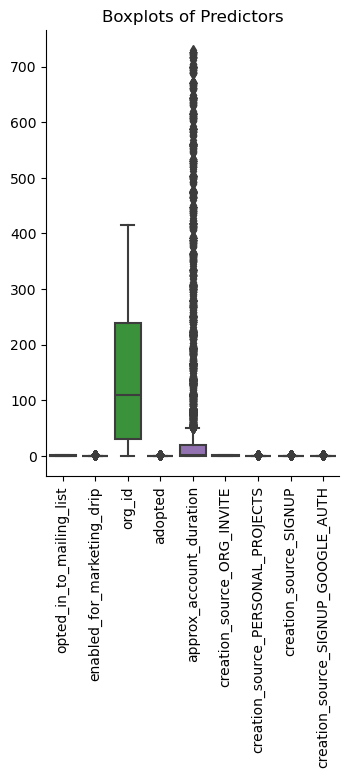

In [164]:
sns.catplot(merger_drop_final_2, kind = 'box').set(title="Boxplots of Predictors")

plt.xticks(rotation = 90)
#plt.set_title("Boxplots of Predictors")
plt.show()


#### Duration of account should be an important factor as to whether a user becomes an adopted user.  I want to investigate if this variable has a normal distribution.

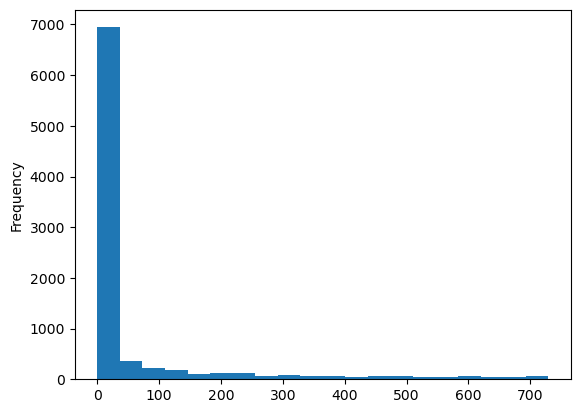

In [165]:
merger_drop_final_2['approx_account_duration'].plot(kind = 'hist', bins = 20)
plt.show()

#### Now that I see the 'approx_account_duration' column has many outliers and is skewed, I will discard the top 20 percent of those values and then use Standard Scaler to make the data 'normal'.

In [166]:
merger_duration_thresh = merger_drop_final_2['approx_account_duration'].quantile(.80)

In [167]:
merger_drop_final_2_chop = merger_drop_final_2[merger_drop_final_2['approx_account_duration'] <= merger_duration_thresh]

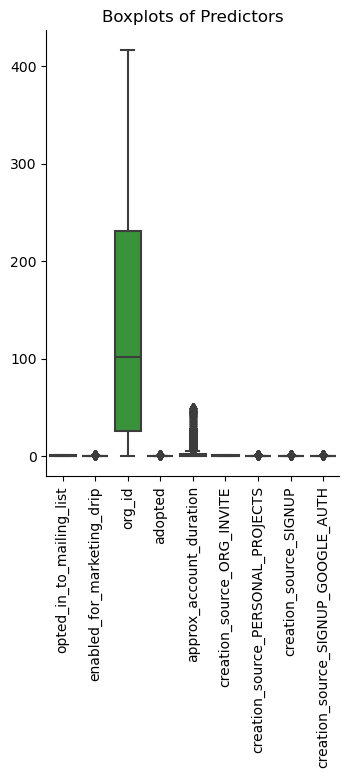

In [168]:
sns.catplot(merger_drop_final_2_chop, kind = 'box').set(title="Boxplots of Predictors")

plt.xticks(rotation = 90)

plt.show()

In [169]:
X_final = merger_drop_final_2_chop.drop(columns = ['adopted'])
y_final = merger_drop_final_2_chop['adopted']

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, random_state = 25)

In [172]:
scaler = StandardScaler()

In [173]:
X_train_scaled = scaler.fit_transform(X_train)

In [174]:
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [175]:
X_test_scaled = scaler.fit_transform(X_test)

In [176]:
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

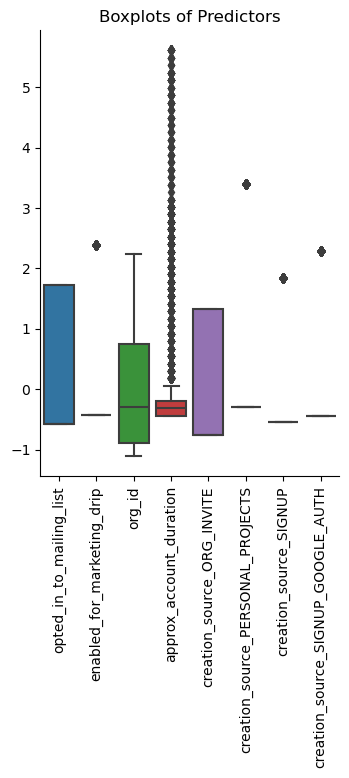

In [177]:
sns.catplot(df_X_train_scaled, kind = 'box').set(title="Boxplots of Predictors")

plt.xticks(rotation = 90)

plt.show()

In [178]:
df_X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            1769 non-null   float64
 1   enabled_for_marketing_drip          1769 non-null   float64
 2   org_id                              1769 non-null   float64
 3   approx_account_duration             1769 non-null   float64
 4   creation_source_ORG_INVITE          1769 non-null   float64
 5   creation_source_PERSONAL_PROJECTS   1769 non-null   float64
 6   creation_source_SIGNUP              1769 non-null   float64
 7   creation_source_SIGNUP_GOOGLE_AUTH  1769 non-null   float64
dtypes: float64(8)
memory usage: 110.7 KB


#### I want to check if the two classes are imbalanced

In [179]:
y_train.value_counts()

adopted
0    5205
1     100
Name: count, dtype: int64

#### Since the classes are imbalanced, I will import RandomOverSampler to make the classes balanced

In [180]:
from imblearn.over_sampling import RandomOverSampler

In [181]:
ROS = RandomOverSampler(sampling_strategy = 1)

In [182]:
X_resample, y_resample = ROS.fit_resample(df_X_train_scaled, y_train)

In [183]:
y_resample.value_counts()

adopted
0    5205
1    5205
Name: count, dtype: int64

#### Now that the data has been cleaned and scaled, and the classes made to be balanced, it is time to build a model.  I will choose the Random Forest Classifier model as it is good for decreasing the liklihood of overfitting.

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
RFC = RandomForestClassifier(max_depth = 6, random_state=25)
RFC.fit(X_resample, y_resample)

RandomForestClassifier(max_depth=6, random_state=25)

In [186]:
y_pred = RFC.predict(df_X_test_scaled)

In [187]:
RFC.feature_importances_

array([0.00445114, 0.00584238, 0.10170735, 0.87418333, 0.00198008,
       0.00204707, 0.0048374 , 0.00495125])

#### Now to determine which features are the most important towards determing if a user will become an adopted user.

In [188]:
X_resample.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'approx_account_duration', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

#### According to the model, the most important features are 'org_id' and 'approximate_account_duration'. 
#### Now I want to examin the effectiveness of the model.  First I will create a confusion matrix to see how many of the 1 and 0 classes are called correctly.

In [189]:
from sklearn.metrics import confusion_matrix

In [191]:
confusion_matrix(y_test, y_pred)

array([[1584,  153],
       [   4,   28]], dtype=int64)

#### Of the 1769 test observations, 157 were predicted incorrectly.  Finally I will measure the accuracy, find cross validation scores using 5 folds, and look at the presision, recall and f1 score.

In [192]:
from sklearn.metrics import accuracy_score
print('The accuracy score of the model is ', accuracy_score(y_test, y_pred))

The accuracy score of the model is  0.9112492933860938


In [193]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, X_resample, y_resample, cv = 5)

array([0.96061479, 0.95965418, 0.95341018, 0.94572526, 0.95965418])

In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['not adopted', 'adopted']))

              precision    recall  f1-score   support

 not adopted       1.00      0.91      0.95      1737
     adopted       0.15      0.88      0.26        32

    accuracy                           0.91      1769
   macro avg       0.58      0.89      0.61      1769
weighted avg       0.98      0.91      0.94      1769



There were two factors that predict future user adoption; one was given from the csv file (Org_ID) and the other one, 'approx_account_duration', was engineered from the 'creation_time' and 'last_session_creation_time' features (approx_account_duration = last_session_creation_time - creation_time).  After creating a column that identified whether or not the users in this set were adopted users, it became apparent from a histogram that the data was not normal and from performing a value_count that the two classes were imbalanced. After removing observations that contained outliers, normalizing the data and creating training and testing sets, I created a Random Forest classifier model that confirmed the earlier statement about the two factors.  The results were a mixed bag since the recall on the 'adopted' class was very good (.88) but the precision on the same class was extremely low (.15).